In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm
import ast

In [2]:
rb_df2 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HC02666/HC02666_rbDF.csv").set_index("Alu")
rb_df2

,Unnamed: 0,RepeatBlock,Lengths,Group,Color,Block_Size
Alu,,,,,,
C_AluY_30358347-30358634,0,0,2214,['45593 372 23.4 4.5 3.3 chrY.01-24.01.PAR1-PA...,#06D6A0,2000-2999
C_AluY_30360759-30361047,1,0,2402,['45596 372 19.8 8.9 2.8 chrY.01-24.01.PAR1-PA...,#06D6A0,2000-2999
C_AluY_30363169-30363457,2,0,2403,['45599 400 24.7 3.9 3.7 chrY.01-24.01.PAR1-PA...,#06D6A0,2000-2999
C_AluY_30365580-30365868,3,0,2404,['45602 379 26.2 3.0 4.2 chrY.01-24.01.PAR1-PA...,#06D6A0,2000-2999
C_AluY_30367996-30368286,4,0,2418,['45605 390 18.8 9.1 2.7 chrY.01-24.01.PAR1-PA...,#06D6A0,2000-2999
...,...,...,...,...,...,...
+_AluSx_54438944-54439272,3730,25,551,['65992 2114 13.0 0.7 0.0 chrY.01-24.01.PAR1-P...,black,<999
+_AluJb_54440400-54440550,3731,25,1012,['65994 18 21.8 0.0 0.0 chrY.01-24.01.PAR1-PAR...,black,1000-1999
+_AluSp_54440551-54440848,3732,25,298,['65996 2102 12.8 0.7 0.3 chrY.01-24.01.PAR1-P...,black,<999


In [3]:
import ast
AluCoordinateDict={}
for row in rb_df2.index:
    AluCoordinateDict[str(ast.literal_eval(rb_df2.at[row,'Group'])[-1].split(" ")[5].split("PAR2.RV.unassigned-0000749.")[1])+":"+str(ast.literal_eval(rb_df2.at[row,'Group'])[0].split(" ")[6])+"-"+str(ast.literal_eval(rb_df2.at[row,'Group'])[-1].split(" ")[7])]= row

In [4]:
AluCoordinateDict

{'HC02666:30356992-30359205': 'C_AluY_30358347-30358634',
 'HC02666:30359213-30361614': 'C_AluY_30360759-30361047',
 'HC02666:30361622-30364024': 'C_AluY_30363169-30363457',
 'HC02666:30364032-30366435': 'C_AluY_30365580-30365868',
 'HC02666:30366436-30368853': 'C_AluY_30367996-30368286',
 'HC02666:30368861-30371269': 'C_AluY_30370411-30370698',
 'HC02666:30372829-30374683': 'C_AluY_30372829-30373091',
 'HC02666:30374697-30377095': '+_AluY_30375259-30375550',
 'HC02666:30377103-30379508': '+_AluY_30377670-30377961',
 'HC02666:30379516-30381915': '+_AluY_30380083-30380374',
 'HC02666:30381934-30384333': '+_AluY_30382501-30382792',
 'HC02666:30384352-30386757': '+_AluY_30384919-30385211',
 'HC02666:30386765-30389154': '+_AluY_30387331-30387623',
 'HC02666:30389162-30390716': '+_AluY_30389729-30390020',
 'HC02666:30914883-30917295': '+_AluY_30915450-30915741',
 'HC02666:30917303-30919713': '+_AluY_30917870-30918161',
 'HC02666:30919721-30922132': '+_AluY_30920288-30920579',
 'HC02666:3092

In [5]:
AluDict = {x:'temp' for x in rb_df2.index}
for alu in AluDict:
    if  rb_df2.loc[alu]['RepeatBlock'] >= 23:
        AluDict[alu]='black'
    else:
        AluDict[alu]= 'green'

AluDict

{'C_AluY_30358347-30358634': 'green',
 'C_AluY_30360759-30361047': 'green',
 'C_AluY_30363169-30363457': 'green',
 'C_AluY_30365580-30365868': 'green',
 'C_AluY_30367996-30368286': 'green',
 'C_AluY_30370411-30370698': 'green',
 'C_AluY_30372829-30373091': 'green',
 '+_AluY_30375259-30375550': 'green',
 '+_AluY_30377670-30377961': 'green',
 '+_AluY_30380083-30380374': 'green',
 '+_AluY_30382501-30382792': 'green',
 '+_AluY_30384919-30385211': 'green',
 '+_AluY_30387331-30387623': 'green',
 '+_AluY_30389729-30390020': 'green',
 '+_AluY_30915450-30915741': 'green',
 '+_AluY_30917870-30918161': 'green',
 '+_AluY_30920288-30920579': 'green',
 '+_AluY_30922707-30922998': 'green',
 '+_AluY_30925125-30925416': 'green',
 '+_AluY_30927544-30927835': 'green',
 '+_AluY_30929964-30930254': 'green',
 '+_AluY_30932383-30932673': 'green',
 '+_AluY_30934802-30935093': 'green',
 '+_AluY_30937220-30937511': 'green',
 '+_AluY_30939636-30939927': 'green',
 '+_AluY_30942072-30942363': 'green',
 '+_AluY_309

In [6]:
AluDict2={}
for x,y in AluDict.items():
    if y == 'black':
        continue
    else:
        AluDict2[x]=0.0

In [7]:
AluDict2

{'C_AluY_30358347-30358634': 0.0,
 'C_AluY_30360759-30361047': 0.0,
 'C_AluY_30363169-30363457': 0.0,
 'C_AluY_30365580-30365868': 0.0,
 'C_AluY_30367996-30368286': 0.0,
 'C_AluY_30370411-30370698': 0.0,
 'C_AluY_30372829-30373091': 0.0,
 '+_AluY_30375259-30375550': 0.0,
 '+_AluY_30377670-30377961': 0.0,
 '+_AluY_30380083-30380374': 0.0,
 '+_AluY_30382501-30382792': 0.0,
 '+_AluY_30384919-30385211': 0.0,
 '+_AluY_30387331-30387623': 0.0,
 '+_AluY_30389729-30390020': 0.0,
 '+_AluY_30915450-30915741': 0.0,
 '+_AluY_30917870-30918161': 0.0,
 '+_AluY_30920288-30920579': 0.0,
 '+_AluY_30922707-30922998': 0.0,
 '+_AluY_30925125-30925416': 0.0,
 '+_AluY_30927544-30927835': 0.0,
 '+_AluY_30929964-30930254': 0.0,
 '+_AluY_30932383-30932673': 0.0,
 '+_AluY_30934802-30935093': 0.0,
 '+_AluY_30937220-30937511': 0.0,
 '+_AluY_30939636-30939927': 0.0,
 '+_AluY_30942072-30942363': 0.0,
 '+_AluY_30944489-30944780': 0.0,
 '+_AluY_30946909-30947200': 0.0,
 '+_AluY_30949327-30949618': 0.0,
 '+_AluY_30951

In [8]:
ASDFList = []
AllBad =[]
for row in rb_df2.index:
    if int(rb_df2.at[row,'RepeatBlock']) >= 23:
        AllBad.append(row)
        continue
    else:
        simple=0
        sat=0
        alu=0
        for repeat in ast.literal_eval(rb_df2.at[row,'Group']):
            if 'Simple_repeat' in str(repeat):
                simple+=1
            elif 'Satellite' in str(repeat):
                sat+=1
            elif 'SINE/Alu' in str(repeat):
                alu+=1
            else:
                continue

        if simple ==0 or sat ==0:
            ASDFList.append(row)
            AllBad.append(row)
        else:
            continue

In [9]:
notableAluY = []
file1 = open('/home/mark/Desktop/chromosome_y/Divergence_Analysis_DYZ/DYZ_young/HC02666_DYZ_nameTrimmed.fasta.out', 'r')
Lines = file1.readlines()
        
for line in Lines:
    goodString = (' '.join(line.split()))
    
    if 'DYZ2_Consensus' in goodString:
        AluDict2[AluCoordinateDict[str(goodString.split(" ")[4])]]=float(goodString.split(" ")[1])
                
    elif 'AluY_Consensus' in goodString:
        notableAluY.append(str(goodString.split(" ")[4]))
                
    else:
        continue

In [10]:
AluDict2

{'C_AluY_30358347-30358634': 2.8,
 'C_AluY_30360759-30361047': 2.0,
 'C_AluY_30363169-30363457': 1.5,
 'C_AluY_30365580-30365868': 3.3,
 'C_AluY_30367996-30368286': 1.6,
 'C_AluY_30370411-30370698': 2.3,
 'C_AluY_30372829-30373091': 3.3,
 '+_AluY_30375259-30375550': 2.8,
 '+_AluY_30377670-30377961': 2.1,
 '+_AluY_30380083-30380374': 2.4,
 '+_AluY_30382501-30382792': 1.8,
 '+_AluY_30384919-30385211': 2.1,
 '+_AluY_30387331-30387623': 2.8,
 '+_AluY_30389729-30390020': 4.1,
 '+_AluY_30915450-30915741': 2.4,
 '+_AluY_30917870-30918161': 1.4,
 '+_AluY_30920288-30920579': 0.9,
 '+_AluY_30922707-30922998': 1.1,
 '+_AluY_30925125-30925416': 0.8,
 '+_AluY_30927544-30927835': 1.3,
 '+_AluY_30929964-30930254': 0.8,
 '+_AluY_30932383-30932673': 0.8,
 '+_AluY_30934802-30935093': 1.1,
 '+_AluY_30937220-30937511': 1.3,
 '+_AluY_30939636-30939927': 1.2,
 '+_AluY_30942072-30942363': 0.7,
 '+_AluY_30944489-30944780': 1.8,
 '+_AluY_30946909-30947200': 1.6,
 '+_AluY_30949327-30949618': 2.1,
 '+_AluY_30951

In [11]:
AluDict3 = {x:y for x,y in AluDict2.items() if x not in AllBad}
print(len(AluDict2))
print(len(AluDict3))

3704
3648


In [12]:
AluDict3

{'C_AluY_30358347-30358634': 2.8,
 'C_AluY_30360759-30361047': 2.0,
 'C_AluY_30363169-30363457': 1.5,
 'C_AluY_30365580-30365868': 3.3,
 'C_AluY_30367996-30368286': 1.6,
 'C_AluY_30370411-30370698': 2.3,
 '+_AluY_30375259-30375550': 2.8,
 '+_AluY_30377670-30377961': 2.1,
 '+_AluY_30380083-30380374': 2.4,
 '+_AluY_30382501-30382792': 1.8,
 '+_AluY_30384919-30385211': 2.1,
 '+_AluY_30387331-30387623': 2.8,
 '+_AluY_30389729-30390020': 4.1,
 '+_AluY_30915450-30915741': 2.4,
 '+_AluY_30917870-30918161': 1.4,
 '+_AluY_30920288-30920579': 0.9,
 '+_AluY_30922707-30922998': 1.1,
 '+_AluY_30925125-30925416': 0.8,
 '+_AluY_30927544-30927835': 1.3,
 '+_AluY_30929964-30930254': 0.8,
 '+_AluY_30932383-30932673': 0.8,
 '+_AluY_30934802-30935093': 1.1,
 '+_AluY_30937220-30937511': 1.3,
 '+_AluY_30939636-30939927': 1.2,
 '+_AluY_30942072-30942363': 0.7,
 '+_AluY_30944489-30944780': 1.8,
 '+_AluY_30946909-30947200': 1.6,
 '+_AluY_30949327-30949618': 2.1,
 '+_AluY_30951746-30952037': 1.3,
 '+_AluY_30954

/home/mark/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

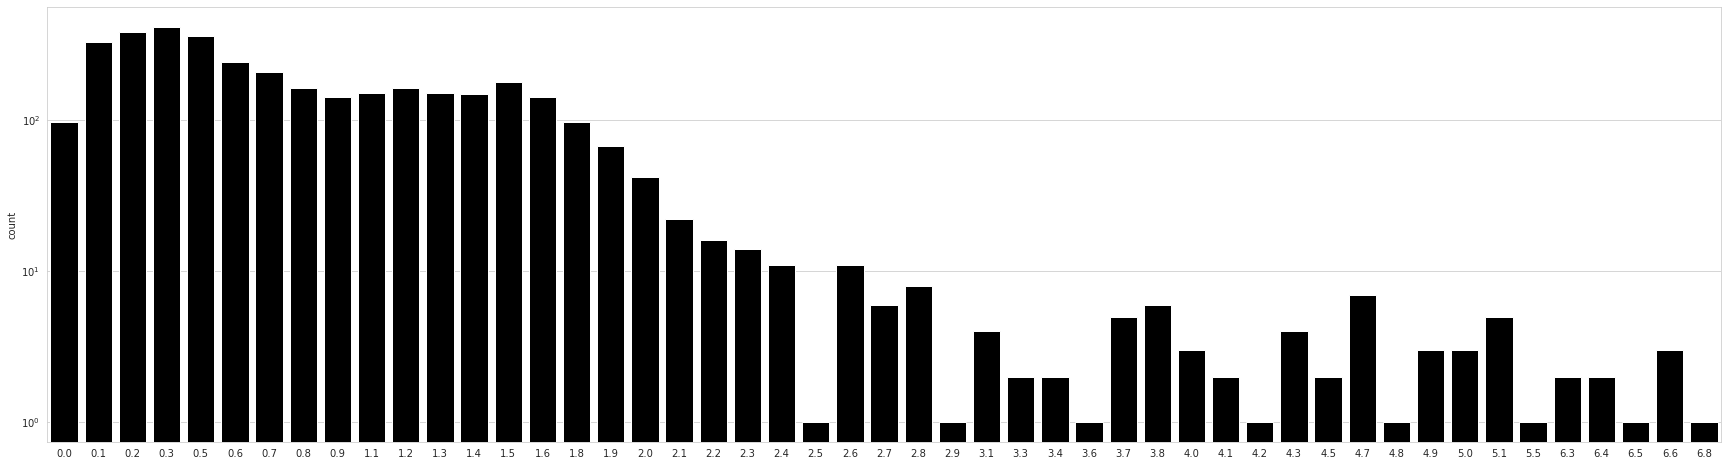

In [13]:
from matplotlib import rcParams
sns.set_style("whitegrid")
rcParams['figure.figsize'] = 30,8
sns.countplot(sorted(list(AluDict3.values())), log=True, color='black')

In [14]:
rb_df2['Divergence']=0.0
for x in rb_df2.index:
    if x in AluDict3.keys():
        rb_df2.at[x,'Divergence']=AluDict3[x]
    else:
        rb_df2.at[x,'Divergence']=100.0
rb_df2

,Unnamed: 0,RepeatBlock,Lengths,Group,Color,Block_Size,Divergence
Alu,,,,,,,
C_AluY_30358347-30358634,0,0,2214,['45593 372 23.4 4.5 3.3 chrY.01-24.01.PAR1-PA...,#06D6A0,2000-2999,2.8
C_AluY_30360759-30361047,1,0,2402,['45596 372 19.8 8.9 2.8 chrY.01-24.01.PAR1-PA...,#06D6A0,2000-2999,2.0
C_AluY_30363169-30363457,2,0,2403,['45599 400 24.7 3.9 3.7 chrY.01-24.01.PAR1-PA...,#06D6A0,2000-2999,1.5
C_AluY_30365580-30365868,3,0,2404,['45602 379 26.2 3.0 4.2 chrY.01-24.01.PAR1-PA...,#06D6A0,2000-2999,3.3
C_AluY_30367996-30368286,4,0,2418,['45605 390 18.8 9.1 2.7 chrY.01-24.01.PAR1-PA...,#06D6A0,2000-2999,1.6
...,...,...,...,...,...,...,...
+_AluSx_54438944-54439272,3730,25,551,['65992 2114 13.0 0.7 0.0 chrY.01-24.01.PAR1-P...,black,<999,100.0
+_AluJb_54440400-54440550,3731,25,1012,['65994 18 21.8 0.0 0.0 chrY.01-24.01.PAR1-PAR...,black,1000-1999,100.0
+_AluSp_54440551-54440848,3732,25,298,['65996 2102 12.8 0.7 0.3 chrY.01-24.01.PAR1-P...,black,<999,100.0


In [15]:
#rb_df2.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/HC02666/rb_df_Divergence.csv")

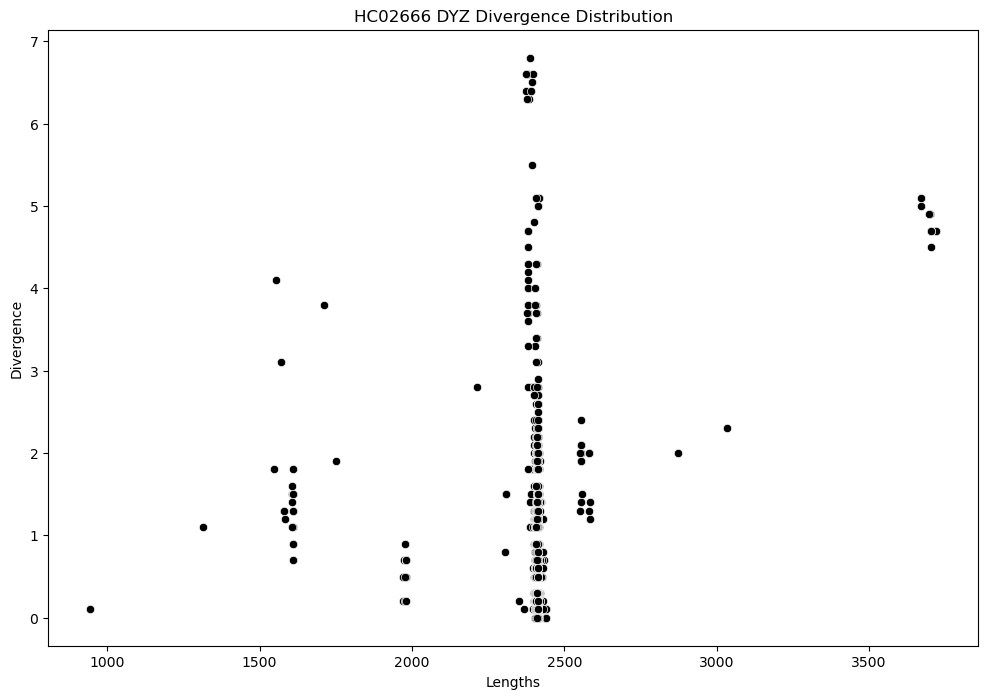

In [79]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 12,8
plt.title("HC02666 DYZ Divergence Distribution")
sns.scatterplot(x=rb_df2[rb_df2['Divergence']!=100.0]['Lengths'], y=rb_df2[rb_df2['Divergence']<100.0]['Divergence'], color='black')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HC02666/HC02666_final_Divergence_Dots.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HC02666/HC02666_final_Divergence_Dots.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [77]:
palette = {x:'temp' for x in set(rb_df2['Block_Size'])}
palette['1000-1999'] = 'Blue'
palette['2000-2999'] = 'Green'
palette['3000-3999'] = 'Red'
palette['<999'] = 'cyan'

[<matplotlib.collections.PathCollection object at 0x7f2434e72220>, <matplotlib.collections.PathCollection object at 0x7f2434d1df70>, <matplotlib.collections.PathCollection object at 0x7f2434d1da60>, <matplotlib.collections.PathCollection object at 0x7f2434d1dbb0>]
['2000-2999', '1000-1999', '3000-3999', '<999']


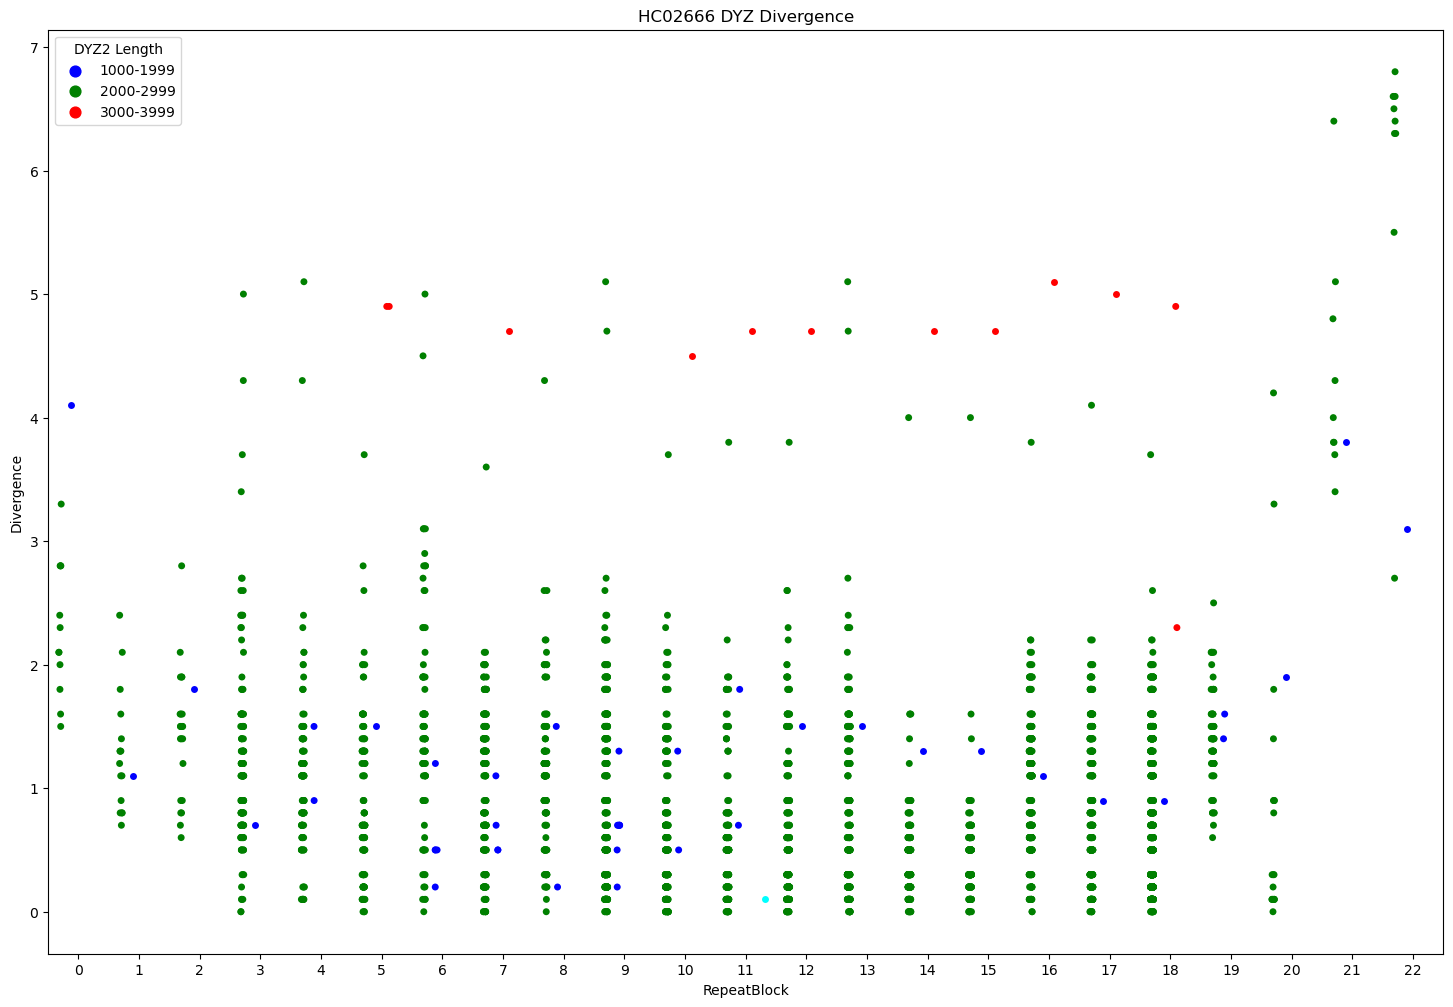

In [81]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 18,12
plt.title("HC02666 DYZ Divergence")
ax=sns.stripplot(x="RepeatBlock", y="Divergence", data=rb_df2[rb_df2['Divergence']!=100.0], dodge=True, hue='Block_Size' , palette=palette)
handles, labels = plt.gca().get_legend_handles_labels()
print(handles)
print(labels)
order = [1,0,2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='DYZ2 Length')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HC02666/HC02666_final_AluSubblock_Dots.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HC02666/HC02666_final_AluSubblock_Dots.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [82]:
for key in AluDict2.keys():
    
    if float(rb_df2.at[key,'Divergence']) == 0.0:
        AluDict[key]='lightgrey'
                
    elif float(rb_df2.at[key,'Divergence']) > 0.0 and float(rb_df2.at[key,'Divergence']) <= 1.0:
        AluDict[key]='#538083' # Steel Teal
    
    elif float(rb_df2.at[key,'Divergence']) > 1.0 and float(rb_df2.at[key,'Divergence']) <= 2.0 :
        AluDict[key]='#2A7F62' #Spanish Viridian

    elif float(rb_df2.at[key,'Divergence']) > 2.0 and float(rb_df2.at[key,'Divergence']) <= 4.0 :
        AluDict[key]='#861657' #Pansy Purple
        
    elif float(rb_df2.at[key,'Divergence']) > 4.0 and float(rb_df2.at[key,'Divergence']) <=6.0 :
        AluDict[key]='#E1CE7A' #Flax
        
    elif float(rb_df2.at[key,'Divergence']) > 6.0 and float(rb_df2.at[key,'Divergence']) <=8.0 :
        AluDict[key]='#F06543' #orange soda

    elif float(rb_df2.at[key,'Divergence']) > 8.0 and float(rb_df2.at[key,'Divergence']) <100.0:
        AluDict[key]='#FF1053' #Radical Red

    else:
        print(key)
        AluDict[key]='black'

C_AluY_30372829-30373091
C_AluY_33337962-33338287
C_AluY_35010649-35010980
C_AluY_35013394-35013726
C_AluY_35016135-35016467
C_AluY_35021294-35021625
C_AluY_36068705-36069039
C_AluY_36071455-36071786
C_AluY_36267664-36267986
C_AluY_37252018-37252350
C_AluY_41226134-41226461
C_AluY_41231294-41231617
C_AluY_41234043-41234370
C_AluY_41239203-41239526
C_AluY_41241952-41242279
C_AluY_41244705-41245033
C_AluY_41382828-41383132
C_AluY_42632221-42632543
C_AluY_43702127-43702449
+_AluY_44820130-44820416
C_AluY_44820512-44820802
+_AluY_46010687-46010971
C_AluY_46011067-46011357
+_AluY_52803700-52803978
+_AluY_54355243-54355543
C_AluSc8_54355830-54356120
+_AluY_54359002-54359297
+_AluSx_54360568-54360881
+_AluSx_54365974-54366283
+_AluSx_54371802-54372209
+_AluSx_54412952-54413261
+_AluJb_54413742-54413768
+_AluJb_54415317-54415583
C_AluJb_54416200-54416413
+_AluSx_54416472-54416752
+_AluJb_54417181-54417472
C_AluJb_54417536-54417828
+_AluSp_54418190-54418483
+_AluSx_54421500-54421795
C_AluSx_544

In [83]:
import collections
collections.Counter(AluDict.values())

Counter({'#861657': 113,
         '#2A7F62': 1147,
         'black': 87,
         '#E1CE7A': 29,
         '#538083': 2253,
         'lightgrey': 97,
         '#F06543': 9})

## Drawing Blocks

In [87]:
import turtle

In [88]:
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
groupNames = sorted(set(rb_df2['RepeatBlock']))
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("HC02666 Yq Heterochromatin Repeat Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(sorted(set(rb_df2['RepeatBlock']))):
    
    totalAlus = len(rb_df2[rb_df2['RepeatBlock']==key])
        
    turtle.color("black")
    turtle.forward(50)
    currentPosition = turtle.position()

    currentPosition = turtle.position()
    
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" Repeat Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    for item in list(rb_df2[rb_df2['RepeatBlock']==key].index):
        
        if 'C_' in item:
            turtle.color(AluDict[item])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.right(90)
            turtle.forward(.5)

        
        elif '+_' in item:
            turtle.color(AluDict[item])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.left(90)
            turtle.forward(.5)

        
        else:
            turtle.color('black')
            turtle.forward(.5)


100%|█| 26/26 [07:24<00:00, 


In [89]:
from PIL import Image

In [90]:
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [91]:
ts = turtle.getscreen()
save_as_png(ts.getcanvas(),"/home/mark/Desktop/chromosome_y/Images/HC02666/HC02666_RM_DYZ_Divergence")

In [92]:
turtle.bye()